# Exercise 11: Ultrasound (II)

> *Type name(s) of participant(s):*  

Necessary imports (run this block before any other code):

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Introduction

This exercise is about a phased array and its operation. Consider a linear array of equidistant transducer elements (aligned in the y-direction) sending ultrasound of 1.5 MHz into a water container that is adjacent in the x-direction. The prepared code below calculates the complex-valued amplitude of the resulting pressure wave in the x-y plane. It does so by summing up partial waves that emanate from the individual transducer elements. The array elements are assumed to be long in the z-direction and of negligible width in the y-direction such that the partial waves can be approximated as cylindrical.

## Section 1

The exercise is initialized below.

In [2]:
# Ultrasound specs

f = 1.5E6                       # Frequency [Hz]
c = 1480                        # Speed of sound in water [m/s]
k = 2*np.pi*f/c                 # Wave number [rad/m]
lambda_m = c/f                  # Wavelength [m]

# Definition of 2D grid for wave calculation

n = 1024                        # Grid size in each dimension
x_range = [0, 0.4]              # Covered range in x [m]
y_range = [-0.2, 0.2]           # Covered range in y [m]

x_values = x_range[0]+(x_range[1]-x_range[0])*np.divide(np.arange(n),n-1)   # Vector of x-values on the grid
y_values = y_range[0]+(y_range[1]-y_range[0])*np.divide(np.arange(n),n-1)   # Vector of y-values on the grid

[x,y] = np.meshgrid(x_values,y_values)    # Grid given by 2D arrays for x- and y-positions

The pressure wave is computed in the x-y plane for the given transducer array then illustrated below.

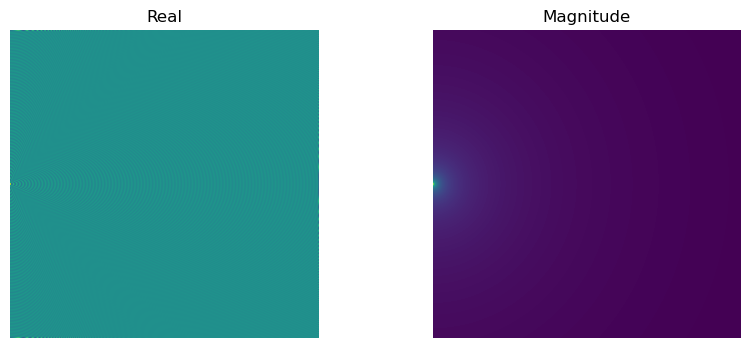

In [3]:
# Transducer array

nt = 1                                   # Number of transducers
pitch = 0.5*lambda_m                     # Spacing of transducers [m]

wave = np.zeros((n,n))                   # Container for pressure wave

# Loop through transducers and sum up their wave contributions
for t in np.arange(1,nt+1):
    
    x0 = -0.001                          # x-Coordinate of transducer, 1 mm outside the container 
    y0 = pitch*(t-(nt+1)/2)              # y-Coordinate of transducer
    
    r = np.sqrt((x-x0)**2+(y-y0)**2)     # Distance from transducer on the grid
           
    phase = 0                            # Phase of transducer input [rad]
    amplitude = 1                        # Relative amplitude of transducer input
    
    wave = wave + np.multiply(np.multiply(np.divide(np.exp(1j*(k*r)),np.sqrt(r)), amplitude), np.exp(1j*phase))   # Add partial wave to net wave
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
img_extent = [0, n, 0, n]
ax1.imshow(np.real(wave),extent=img_extent,vmin=-1,vmax=1)
ax1.set_title('Real'); ax1.set_xticks([]); ax1.set_yticks([]); ax1.set_axis_off()
ax2.imshow(np.abs(wave),extent=img_extent)
ax2.set_title('Magnitude'); ax2.set_xticks([]); ax2.set_yticks([]); ax2.set_axis_off()

### Task 1.1
> The number of array elements is initially set to just 1. Examine the resulting wave. If we view it as a limiting case of a single-transducer beam as discussed in the lecture, what are its NFB, lateral resolution, and broadening angle $\theta$?

*Type your answer in this cell:*
$$near-field boundary, Z_{NFB}\approx \frac{r^2}{\lambda _{tissue}} ,Z_{NFB} \rightarrow 0$$
$$lateral resolution \approx 2r ,r\rightarrow 0 ,lateral resolution \rightarrow 0$$
$$\theta =arcsin(\frac{0.61\lambda}{r}) \rightarrow 90^o$$

### Task 1.2
> In the code cell below, increase the number of transducer elements at the preset pitch of $\lambda$/2. What happens as the number of transducers increases? How does the many-element case relate to what you expect from a single flat transducer?

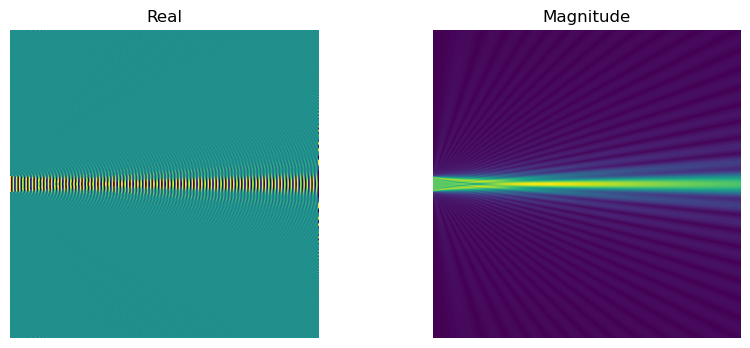

In [13]:
# Transducer array

nt = 40                                   # Number of transducers
pitch = 0.5*lambda_m                     # Spacing of transducers [m]

wave = np.zeros((n,n))                   # Container for pressure wave

# Loop through transducers and sum up their wave contributions
for t in np.arange(1,nt+1):
    
    x0 = -0.001                          # x-Coordinate of transducer, 1 mm outside the container 
    y0 = pitch*(t-(nt+1)/2)              # y-Coordinate of transducer
    
    r = np.sqrt((x-x0)**2+(y-y0)**2)     # Distance from transducer on the grid
           
    phase = 0                           # Phase of transducer input [rad]
    amplitude = 1                        # Relative amplitude of transducer input
    
    wave = wave + np.multiply(np.multiply(np.divide(np.exp(1j*(k*r)),np.sqrt(r)), amplitude), np.exp(1j*phase))   # Add partial wave to net wave
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
img_extent = [0, n, 0, n]
ax1.imshow(np.real(wave),extent=img_extent,vmin=-1,vmax=1)
ax1.set_title('Real'); ax1.set_xticks([]); ax1.set_yticks([]); ax1.set_axis_off()
ax2.imshow(np.abs(wave),extent=img_extent)
ax2.set_title('Magnitude'); ax2.set_xticks([]); ax2.set_yticks([]); ax2.set_axis_off()

*Type your answer in this cell:* r increases ,so $Z_{NFB}$ and lateral resolution increase ,broadening angle decreases

## Section 2

For the remaining tasks, modify the respective code cell as necessary to produce the intended result; forty transducer elements are now used. In addition to implementing each solution in code, please explain relevant principles/equations by which you arrived at your implementation within the respective text cell.

### Task 2.1
> Initially, all transducers are driven in-phase ($\Delta\phi=0$ for all y). Now, alter the phasing to deflect the beam by $\alpha=20^{\circ}$.

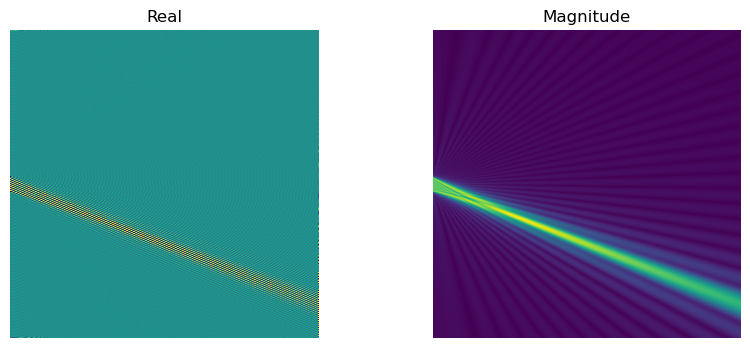

In [14]:
# Transducer array

nt = 40                                  # Number of transducers
pitch = 0.5*lambda_m                     # Spacing of transducers [m]

wave = np.zeros((n,n))                   # Container for pressure wave

# Loop through transducers and sum up their wave contributions
for t in np.arange(1,nt+1):
    
    x0 = -0.001                          # x-Coordinate of transducer, 1 mm outside the container 
    y0 = pitch*(t-(nt+1)/2)              # y-Coordinate of transducer
    
    r = np.sqrt((x-x0)**2+(y-y0)**2)     # Distance from transducer on the grid
           
    phase += 1.14                         # Phase of transducer input [rad]
    amplitude = 1                        # Relative amplitude of transducer input
    
    wave = wave + np.multiply(np.multiply(np.divide(np.exp(1j*(k*r)),np.sqrt(r)), amplitude), np.exp(1j*phase))   # Add partial wave to net wave

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
img_extent = [0, n, 0, n]
ax1.imshow(np.real(wave),extent=img_extent,vmin=-1,vmax=1)
ax1.set_title('Real'); ax1.set_xticks([]); ax1.set_yticks([]); ax1.set_axis_off()
ax2.imshow(np.abs(wave),extent=img_extent)
ax2.set_title('Magnitude'); ax2.set_xticks([]); ax2.set_yticks([]); ax2.set_axis_off()

*Explain your implementation in this cell:*

### Task 2.2
> Provoke a grating lobe.

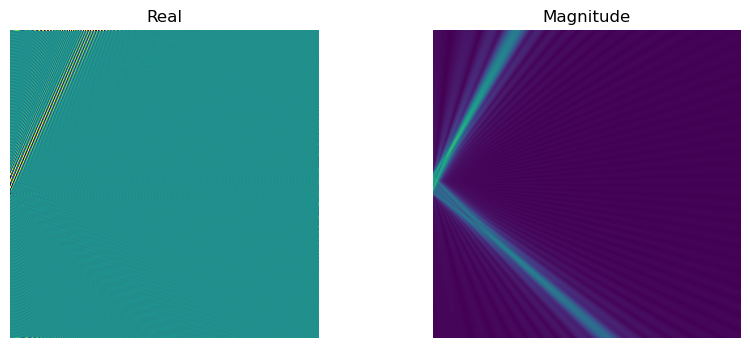

In [15]:
# Transducer array

nt = 40                                  # Number of transducers
pitch = 0.65*lambda_m                     # Spacing of transducers [m]

wave = np.zeros((n,n))                   # Container for pressure wave

# Loop through transducers and sum up their wave contributions
for t in np.arange(1,nt+1):
    
    x0 = -0.001                          # x-Coordinate of transducer, 1 mm outside the container 
    y0 = pitch*(t-(nt+1)/2)              # y-Coordinate of transducer
    
    r = np.sqrt((x-x0)**2+(y-y0)**2)     # Distance from transducer on the grid
           
    phase += 2.7                            # Phase of transducer input [rad]
    amplitude = 1                        # Relative amplitude of transducer input
    
    wave = wave + np.multiply(np.multiply(np.divide(np.exp(1j*(k*r)),np.sqrt(r)), amplitude), np.exp(1j*phase))   # Add partial wave to net wave

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
img_extent = [0, n, 0, n]
ax1.imshow(np.real(wave),extent=img_extent,vmin=-1,vmax=1)
ax1.set_title('Real'); ax1.set_xticks([]); ax1.set_yticks([]); ax1.set_axis_off()
ax2.imshow(np.abs(wave),extent=img_extent)
ax2.set_title('Magnitude'); ax2.set_xticks([]); ax2.set_yticks([]); ax2.set_axis_off()

*Explain your implementation in this cell:*

### Task 2.3
> Manipulate the phasing to focus at a depth of d = 5 cm.

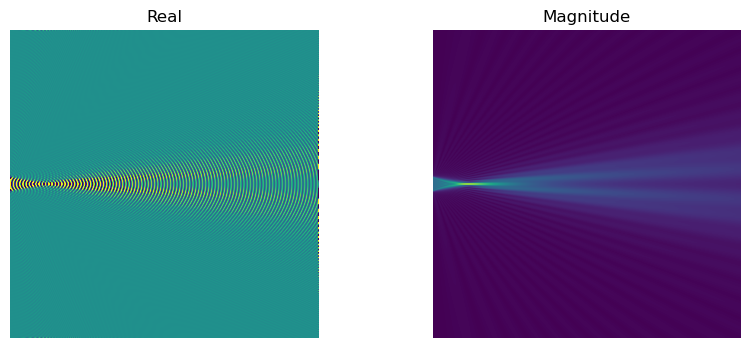

In [7]:
# Transducer array

nt = 40                                  # Number of transducers
pitch = 0.5*lambda_m                     # Spacing of transducers [m]

wave = np.zeros((n,n))                   # Container for pressure wave

radi = 0.05;
# Loop through transducers and sum up their wave contributions
for t in np.arange(1,nt+1):
    
    x0 = -0.001                          # x-Coordinate of transducer, 1 mm outside the container 
    y0 = pitch*(t-(nt+1)/2)              # y-Coordinate of transducer
    
    r = np.sqrt((x-x0)**2+(y-y0)**2)     # Distance from transducer on the grid
           
    phase = -2 * np.pi * radi / lambda_m + 2 * np.pi * np.sqrt((radi / lambda_m)**2 - ((((nt + 1) / 2) - t) / 2)**2)      # Phase of transducer input [rad]
    amplitude = 1                        # Relative amplitude of transducer input
    
    wave = wave + np.multiply(np.multiply(np.divide(np.exp(1j*(k*r)),np.sqrt(r)), amplitude), np.exp(1j*phase))   # Add partial wave to net wave

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
img_extent = [0, n, 0, n]
ax1.imshow(np.real(wave),extent=img_extent,vmin=-1,vmax=1)
ax1.set_title('Real'); ax1.set_xticks([]); ax1.set_yticks([]); ax1.set_axis_off()
ax2.imshow(np.abs(wave),extent=img_extent)
ax2.set_title('Magnitude'); ax2.set_xticks([]); ax2.set_yticks([]); ax2.set_axis_off()

*Explain your implementation in this cell:*

### Task 2.4
> As prepared, the code assumes unit amplitude for all transducer elements. Now, vary the amplitude according to a Gaussian bell function along the array. Choose the width of the Gaussian such that amplitude drops to about 10% for the outermost transducer elements.

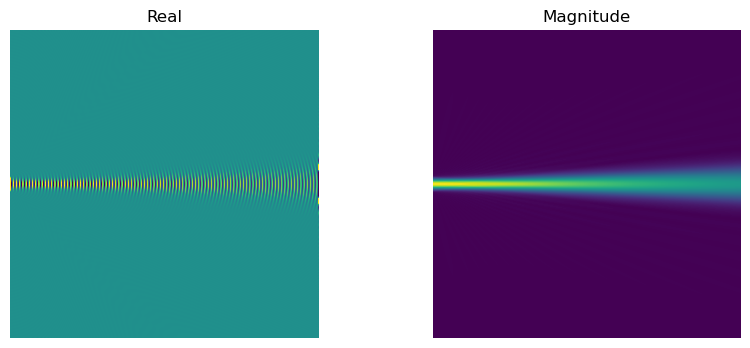

In [8]:
# Transducer array

nt = 40                                  # Number of transducers
pitch = 0.5*lambda_m                     # Spacing of transducers [m]

wave = np.zeros((n,n))                   # Container for pressure wave

# Loop through transducers and sum up their wave contributions
for t in np.arange(1,nt+1):
    
    x0 = -0.001                          # x-Coordinate of transducer, 1 mm outside the container 
    y0 = pitch*(t-(nt+1)/2)              # y-Coordinate of transducer
    
    r = np.sqrt((x-x0)**2+(y-y0)**2)     # Distance from transducer on the grid
           
    phase = 0                            # Phase of transducer input [rad]
    amplitude = 1 * np.exp(-0.5*((t-20.5)/9.0868167)**2); # Relative amplitude of transducer input
    wave = wave + np.multiply(np.multiply(np.divide(np.exp(1j*(k*r)),np.sqrt(r)), amplitude), np.exp(1j*phase))   # Add partial wave to net wave

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
img_extent = [0, n, 0, n]
ax1.imshow(np.real(wave),extent=img_extent,vmin=-1,vmax=1)
ax1.set_title('Real'); ax1.set_xticks([]); ax1.set_yticks([]); ax1.set_axis_off()
ax2.imshow(np.abs(wave),extent=img_extent)
ax2.set_title('Magnitude'); ax2.set_xticks([]); ax2.set_yticks([]); ax2.set_axis_off()

*Explain your implementation in this cell:*